In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

red_wine = pd.read_csv('../data/winequality-red.csv')
white_wine = pd.read_csv('../data/winequality-white.csv', sep=';')

In [25]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Ознакомление с данными

In [26]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [27]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


<AxesSubplot:title={'center':'Red Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

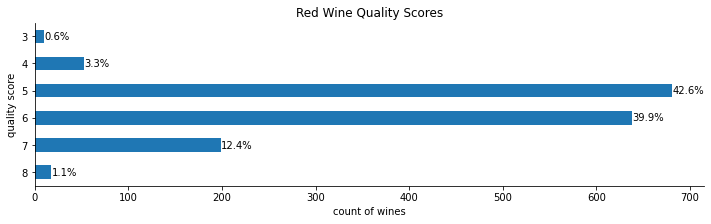

In [28]:
def plot_quality_scores(df, kind):
    ax = df.quality.value_counts().sort_index().plot.barh(
        title=f'{kind.title()} Wine Quality Scores',
        figsize=(12, 3)
    ) 
    ax.axes.invert_yaxis()
    for bar in ax.patches:
        ax.text(
            bar.get_width(),
            bar.get_y() + bar.get_height()/2,
            f'{bar.get_width()/df.shape[0]:.1%}',
            verticalalignment='center'
        )
    plt.xlabel('count of wines')
    plt.ylabel('quality score')

    for spine in ['top', 'right']:
        ax.spines[spine].set_visible(False)

    return ax
plot_quality_scores(red_wine, 'red')

<AxesSubplot:title={'center':'White Wine Quality Scores'}, xlabel='count of wines', ylabel='quality score'>

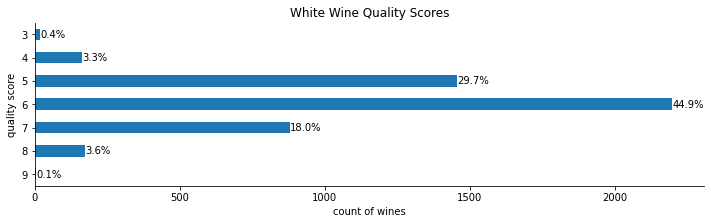

In [29]:
plot_quality_scores(white_wine, 'white')

Объединение данных

In [30]:
wine = pd.concat([
    white_wine.assign(kind='white'), red_wine.assign(kind='red')
])
wine.sample(5, random_state=10).T

,848,2529,131,244,1551
fixed acidity,6.40000,6.60000,5.6000,15.00000,6.6000
volatile acidity,0.64000,0.42000,0.5000,0.21000,0.1900
citric acid,0.21000,0.13000,0.0900,0.44000,0.9900
residual sugar,1.80000,12.80000,2.3000,2.20000,1.2000
chlorides,0.08100,0.04400,0.0490,0.07500,0.1220
free sulfur dioxide,14.00000,26.00000,17.0000,10.00000,45.0000
total sulfur dioxide,31.00000,158.00000,99.0000,24.00000,129.0000
density,0.99689,0.99772,0.9937,1.00005,0.9936
pH,3.59000,3.24000,3.6300,3.07000,3.0900
sulphates,0.66000,0.47000,0.6300,0.84000,0.3100


Общая справка по объединенным данным

In [31]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  kind                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


In [32]:
wine.drop(columns='quality').describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


Кластеризация с целью разделения красного и белого вин

In [33]:
wine_y = wine.kind
wine_X = wine.drop(columns=['quality', 'kind'])


w_X_train, w_X_test, w_y_train, w_y_test = train_test_split(wine_X, wine_y, test_size=0.25, random_state=0, stratify=wine_y)

kmeans_pipeline = Pipeline([
    ('scale', StandardScaler()), 
    ('kmeans', KMeans(n_clusters=2, random_state=0))
]).fit(w_X_train)

Определение сходства между предсказанным типом вина и изначальными данными с использованием индекса Фоулкса-Мэллова

In [34]:
pd.Series(kmeans_pipeline.predict(w_X_test)).value_counts()

0    1211
1     414
dtype: int64

In [35]:
w_y_test.value_counts()

white    1225
red       400
Name: kind, dtype: int64

In [36]:
from sklearn.metrics import fowlkes_mallows_score
fowlkes_mallows_score(np.where(w_y_test == 'red', 0, 1), kmeans_pipeline.predict(w_X_test))

0.9824673716471775

Нахождение центроида.

In [37]:
pd.DataFrame(
    kmeans_pipeline.named_steps['kmeans'].cluster_centers_,
    columns=w_X_train.columns
).T

,0,1
fixed acidity,-0.275759,0.811214
volatile acidity,-0.400013,1.176737
citric acid,0.124803,-0.367138
residual sugar,0.213872,-0.629158
chlorides,-0.319649,0.940326
free sulfur dioxide,0.286878,-0.843924
total sulfur dioxide,0.404915,-1.191159
density,-0.224677,0.660942
pH,-0.194171,0.571201
sulphates,-0.288408,0.848424
